# Exploratory data analysis

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [54]:
stats_df = pd.read_csv("Data/season_counting_stats.csv")
transaction_df = pd.read_csv("Data/transaction_data/transaction_data.csv")

In [55]:
stats_df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,NAME,SEASON_START
0,2,1983-84,0,1610612747,LAL,23.0,74,49.0,1637.0,334,...,114.0,164.0,177,81.0,19.0,116.0,174,788,Byron Scott,1983
1,2,1984-85,0,1610612747,LAL,24.0,81,65.0,2305.0,541,...,153.0,210.0,244,100.0,17.0,138.0,197,1295,Byron Scott,1984
2,2,1985-86,0,1610612747,LAL,25.0,76,62.0,2190.0,507,...,134.0,189.0,164,85.0,15.0,110.0,167,1174,Byron Scott,1985
3,2,1986-87,0,1610612747,LAL,26.0,82,82.0,2729.0,554,...,223.0,286.0,281,125.0,18.0,144.0,163,1397,Byron Scott,1986
4,2,1987-88,0,1610612747,LAL,27.0,81,81.0,3048.0,710,...,257.0,333.0,335,155.0,27.0,161.0,204,1754,Byron Scott,1987


In [56]:
stats_df.drop(columns=["SEASON_ID", "LEAGUE_ID", "TEAM_ID"], inplace=True)

In [57]:
transaction_df.head()

,SEASON_START,DATE,PLAYER_NAME,BBREF_ID,TEAM_ABBREVIATION,WAIVED,TRADED,PLAYER_ID
0,1990,"July 5, 1990",Anthony Bowie,bowiean01,HOU,1,0,194
1,1990,"July 9, 1990",Randy Allen,allenra01,SAC,1,0,76025
2,1990,"July 9, 1990",Michael Jackson,jacksmi02,SAC,1,0,77104
3,1990,"July 24, 1990",Melvin Turpin,turpime01,WAS,1,0,78386
4,1990,"August 10, 1990",Scott Haffner,haffnsc01,MIA,1,0,76911


In [58]:
transaction_df.drop(columns=["PLAYER_NAME", "BBREF_ID"], inplace=True)

In [59]:
nba_df = pd.merge(stats_df, transaction_df, how="left", on=["PLAYER_ID", "TEAM_ABBREVIATION", "SEASON_START"])

In [60]:
nba_df

,PLAYER_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,STL,BLK,TOV,PF,PTS,NAME,SEASON_START,DATE,WAIVED,TRADED
0,2,LAL,23.0,74,49.0,1637.0,334,690,0.484,8.0,...,81.0,19.0,116.0,174,788,Byron Scott,1983,NaN,NaN,NaN
1,2,LAL,24.0,81,65.0,2305.0,541,1003,0.539,26.0,...,100.0,17.0,138.0,197,1295,Byron Scott,1984,NaN,NaN,NaN
2,2,LAL,25.0,76,62.0,2190.0,507,989,0.513,22.0,...,85.0,15.0,110.0,167,1174,Byron Scott,1985,NaN,NaN,NaN
3,2,LAL,26.0,82,82.0,2729.0,554,1134,0.489,65.0,...,125.0,18.0,144.0,163,1397,Byron Scott,1986,NaN,NaN,NaN
4,2,LAL,27.0,81,81.0,3048.0,710,1348,0.527,62.0,...,155.0,27.0,161.0,204,1754,Byron Scott,1987,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30037,1641970,MEM,23.0,7,1.0,122.0,18,35,0.514,5.0,...,6.0,4.0,5.0,10,48,Maozinha Pereira,2023,NaN,NaN,NaN
30038,1641998,WAS,24.0,2,0.0,1.0,0,0,0.000,0.0,...,0.0,0.0,1.0,0,0,Trey Jemison,2023,NaN,NaN,NaN
30039,1641998,MEM,24.0,23,14.0,573.0,75,136,0.551,0.0,...,12.0,28.0,33.0,69,171,Trey Jemison,2023,NaN,NaN,NaN
30040,1641998,TOT,24.0,25,14.0,574.0,75,136,0.551,0.0,...,12.0,28.0,34.0,69,171,Trey Jemison,2023,NaN,NaN,NaN


In [61]:
nba_df.sample(10)

,PLAYER_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,STL,BLK,TOV,PF,PTS,NAME,SEASON_START,DATE,WAIVED,TRADED
6447,1520,LAC,23.0,23,10.0,317.0,35,97,0.361,7.0,...,17.0,14.0,20.0,35,84,Charles Smith,1998,NaN,NaN,NaN
27908,1628403,POR,22.0,18,0.0,145.0,14,44,0.318,1.0,...,4.0,0.0,16.0,22,35,Caleb Swanigan,2018,"February 7, 2019",0.0,1.0
16562,77528,NOJ,22.0,51,NaN,1134.0,151,296,0.510,NaN,...,44.0,4.0,NaN,70,383,Jim McElroy,1975,NaN,NaN,NaN
19929,78440,NYK,25.0,68,21.0,1595.0,204,384,0.531,2.0,...,33.0,52.0,60.0,178,535,Kenny Walker,1989,NaN,NaN,NaN
7586,1889,DEN,29.0,82,82.0,2852.0,427,895,0.477,6.0,...,121.0,8.0,220.0,204,1113,Andre Miller,2004,NaN,NaN,NaN
21449,200746,POR,24.0,78,78.0,2922.0,579,1169,0.495,5.0,...,67.0,48.0,104.0,231,1393,LaMarcus Aldridge,2009,NaN,NaN,NaN
24573,202704,TOT,33.0,68,40.0,1657.0,263,640,0.411,96.0,...,47.0,6.0,115.0,114,693,Reggie Jackson,2022,NaN,NaN,NaN
23135,201933,LAC,27.0,35,35.0,1170.0,301,603,0.499,6.0,...,28.0,17.0,83.0,95,749,Blake Griffin,2015,NaN,NaN,NaN
26251,203935,BOS,27.0,48,45.0,1581.0,203,510,0.398,93.0,...,72.0,23.0,96.0,126,627,Marcus Smart,2020,NaN,NaN,NaN
13700,76801,NJN,25.0,48,1.0,380.0,51,135,0.378,0.0,...,10.0,3.0,31.0,25,122,Tate George,1992,NaN,NaN,NaN


In [62]:
# replace NULL values in WAIVED and TRADED with 0.0

nba_df.fillna({"WAIVED": 0.0, "TRADED": 0.0}, inplace=True)

In [63]:
nba_df

,PLAYER_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,STL,BLK,TOV,PF,PTS,NAME,SEASON_START,DATE,WAIVED,TRADED
0,2,LAL,23.0,74,49.0,1637.0,334,690,0.484,8.0,...,81.0,19.0,116.0,174,788,Byron Scott,1983,NaN,0.0,0.0
1,2,LAL,24.0,81,65.0,2305.0,541,1003,0.539,26.0,...,100.0,17.0,138.0,197,1295,Byron Scott,1984,NaN,0.0,0.0
2,2,LAL,25.0,76,62.0,2190.0,507,989,0.513,22.0,...,85.0,15.0,110.0,167,1174,Byron Scott,1985,NaN,0.0,0.0
3,2,LAL,26.0,82,82.0,2729.0,554,1134,0.489,65.0,...,125.0,18.0,144.0,163,1397,Byron Scott,1986,NaN,0.0,0.0
4,2,LAL,27.0,81,81.0,3048.0,710,1348,0.527,62.0,...,155.0,27.0,161.0,204,1754,Byron Scott,1987,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30037,1641970,MEM,23.0,7,1.0,122.0,18,35,0.514,5.0,...,6.0,4.0,5.0,10,48,Maozinha Pereira,2023,NaN,0.0,0.0
30038,1641998,WAS,24.0,2,0.0,1.0,0,0,0.000,0.0,...,0.0,0.0,1.0,0,0,Trey Jemison,2023,NaN,0.0,0.0
30039,1641998,MEM,24.0,23,14.0,573.0,75,136,0.551,0.0,...,12.0,28.0,33.0,69,171,Trey Jemison,2023,NaN,0.0,0.0
30040,1641998,TOT,24.0,25,14.0,574.0,75,136,0.551,0.0,...,12.0,28.0,34.0,69,171,Trey Jemison,2023,NaN,0.0,0.0


In [64]:
nba_df.columns

Index(['PLAYER_ID', 'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN',
       'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'NAME', 'SEASON_START', 'DATE', 'WAIVED', 'TRADED'],
      dtype='object')

In [65]:
features = ['PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
            'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB',
            'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SEASON_START']

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [67]:
pipe = Pipeline([("scale", StandardScaler()), ("pca", PCA())])

In [68]:
pipe.fit(nba_df.dropna(subset=features)[features])

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA())])

In [76]:
pipe["pca"].explained_variance_ratio_

array([5.60101530e-01, 1.25518642e-01, 5.61621234e-02, 4.78929239e-02,
       4.24768342e-02, 3.11464700e-02, 2.81291648e-02, 2.58934941e-02,
       2.18162132e-02, 1.45611118e-02, 1.26452032e-02, 8.95194946e-03,
       7.35639800e-03, 5.83598565e-03, 4.15878851e-03, 3.39575883e-03,
       2.14312843e-03, 9.77002746e-04, 3.99822373e-04, 2.80088056e-04,
       1.57367073e-04, 5.30541633e-18, 0.00000000e+00])

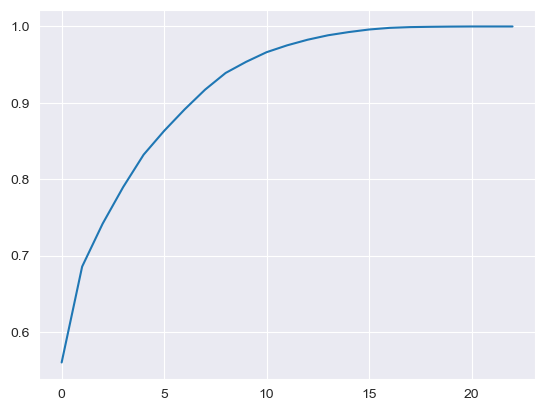

In [75]:
plt.plot(np.cumsum(pipe["pca"].explained_variance_ratio_))
plt.show()

In [77]:
np.cumsum(pipe["pca"].explained_variance_ratio_)

array([0.56010153, 0.68562017, 0.7417823 , 0.78967522, 0.83215205,
       0.86329852, 0.89142769, 0.91732118, 0.9391374 , 0.95369851,
       0.96634371, 0.97529566, 0.98265206, 0.98848804, 0.99264683,
       0.99604259, 0.99818572, 0.99916272, 0.99956254, 0.99984263,
       1.        , 1.        , 1.        ])

In [78]:
fit = pipe.transform(nba_df.dropna(subset=features)[features])

In [88]:
pca_df = pd.DataFrame({'waived': nba_df.dropna(subset=features)["WAIVED"].copy()})
pca_df["pca_1"] = fit[:,0]
pca_df["pca_2"] = fit[:,1]

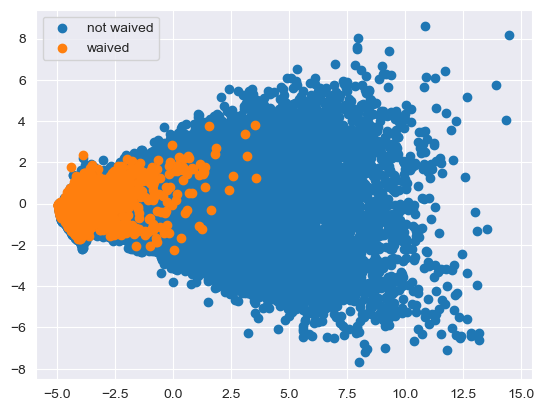

In [90]:
plt.scatter(pca_df.loc[pca_df["waived"]==0, "pca_1"], pca_df.loc[pca_df["waived"]==0, "pca_2"], label="not waived")
plt.scatter(pca_df.loc[pca_df["waived"]==1, "pca_1"], pca_df.loc[pca_df["waived"]==1, "pca_2"], label="waived")
plt.legend()
plt.show()

In [71]:
nba_df.dropna(subset=features)

,PLAYER_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,STL,BLK,TOV,PF,PTS,NAME,SEASON_START,DATE,WAIVED,TRADED
0,2,LAL,23.0,74,49.0,1637.0,334,690,0.484,8.0,...,81.0,19.0,116.0,174,788,Byron Scott,1983,NaN,0.0,0.0
1,2,LAL,24.0,81,65.0,2305.0,541,1003,0.539,26.0,...,100.0,17.0,138.0,197,1295,Byron Scott,1984,NaN,0.0,0.0
2,2,LAL,25.0,76,62.0,2190.0,507,989,0.513,22.0,...,85.0,15.0,110.0,167,1174,Byron Scott,1985,NaN,0.0,0.0
3,2,LAL,26.0,82,82.0,2729.0,554,1134,0.489,65.0,...,125.0,18.0,144.0,163,1397,Byron Scott,1986,NaN,0.0,0.0
4,2,LAL,27.0,81,81.0,3048.0,710,1348,0.527,62.0,...,155.0,27.0,161.0,204,1754,Byron Scott,1987,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30037,1641970,MEM,23.0,7,1.0,122.0,18,35,0.514,5.0,...,6.0,4.0,5.0,10,48,Maozinha Pereira,2023,NaN,0.0,0.0
30038,1641998,WAS,24.0,2,0.0,1.0,0,0,0.000,0.0,...,0.0,0.0,1.0,0,0,Trey Jemison,2023,NaN,0.0,0.0
30039,1641998,MEM,24.0,23,14.0,573.0,75,136,0.551,0.0,...,12.0,28.0,33.0,69,171,Trey Jemison,2023,NaN,0.0,0.0
30040,1641998,TOT,24.0,25,14.0,574.0,75,136,0.551,0.0,...,12.0,28.0,34.0,69,171,Trey Jemison,2023,NaN,0.0,0.0


In [72]:
id_df = pd.read_csv("./Data/NBA_Player_IDs.csv", encoding="latin-1")

In [73]:
id_df.head()

,BBRefName,BBRefLink,BBRefID,BBRefBirthDate,NBAName,NBALink,NBAID,NBABirthDate,ESPNName,ESPNLink,ESPNID,ESPNBirthDate,SpotracName,SpotracLink,SpotracID
0,A.J. Hammons,https://www.basketball-reference.com/players/h...,hammoaj01,8/27/1992,AJ Hammons,https://stats.nba.com/player/1627773/,1627773.0,8/27/1992,AJ Hammons,http://www.espn.com/nba/player/_/id/2991178/aj...,2991178.0,8/27/1992,A.J. Hammons,https://www.spotrac.com/redirect/player/20252/,20252.0
1,A.J. Price,https://www.basketball-reference.com/players/p...,priceaj01,10/7/1986,AJ Price,https://stats.nba.com/player/201985/,201985.0,10/7/1986,A.J. Price,http://www.espn.com/nba/player/_/id/4010/aj-price,4010.0,10/7/1986,A.J. Price,https://www.spotrac.com/redirect/player/6292/,6292.0
2,Aaron Brooks,https://www.basketball-reference.com/players/b...,brookaa01,1/14/1985,Aaron Brooks,https://stats.nba.com/player/201166/,201166.0,1/14/1985,Aaron Brooks,http://www.espn.com/nba/player/_/id/3192/aaron...,3192.0,1/14/1985,Aaron Brooks,https://www.spotrac.com/redirect/player/2390/,2390.0
3,Aaron Gordon,https://www.basketball-reference.com/players/g...,gordoaa01,9/16/1995,Aaron Gordon,https://stats.nba.com/player/203932/,203932.0,9/16/1995,Aaron Gordon,http://www.espn.com/nba/player/_/id/3064290/aa...,3064290.0,9/16/1995,Aaron Gordon,https://www.spotrac.com/redirect/player/15356/,15356.0
4,Aaron Gray,https://www.basketball-reference.com/players/g...,grayaa01,12/7/1984,Aaron Gray,https://stats.nba.com/player/201189/,201189.0,12/7/1984,Aaron Gray,http://www.espn.com/nba/player/_/id/3207/aaron...,3207.0,12/7/1984,Aaron Gray,https://www.spotrac.com/redirect/player/2244/,2244.0


In [5]:
salary_df = pd.read_csv("./Data/SalaryData/player_salaries.csv")

In [6]:
salary_df.sample(10)

,Year,Team,Player,Salary,Percent_team_salary
9169,2007.0,WAS,Dominic McGuire,427163.0,0.006544
15361,2021.0,DET,Cheick Diallo,102831.0,0.000784
3009,1997.0,IND,Austin Croshere,1165440.0,0.029759
13693,2017.0,NOP,Mike James,77250.0,0.000639
6002,2005.0,NYK,Jackie Butler,398762.0,0.003149
3989,1997.0,POR,Stacey Augmon,2800000.0,0.100768
10158,2015.0,HOU,Corey Brewer,8229375.0,0.094046
3509,1998.0,MIN,Malik Sealy,1000000.0,0.030205
9667,2012.0,CLE,Luke Walton,6091363.0,0.087870
2004,1995.0,UTA,Greg Ostertag,498000.0,0.022182


In [10]:
from nba_api.stats.static import players

In [22]:
pos_count = 0
neg_count = 0
no_id = []

for i in range(len(salary_df)):
    player_name = salary_df.iloc[i].Player
    if len(players.find_players_by_full_name("player_name")) == 1:
        pos_count += 1
    elif len(id_df.loc[id_df["BBRefName"]==player_name, "NBAID"]) == 1:
        pos_count += 1
    elif len(id_df.loc[id_df["ESPNName"]==player_name, "NBAID"]) == 1:
        pos_count += 1
    elif len(id_df.loc[id_df["NBAName"]==player_name, "NBAID"]) == 1:
        pos_count += 1
    elif len(id_df.loc[id_df["SpotracName"]==player_name, "NBAID"]) == 1:
        pos_count += 1
    else:
        neg_count += 1
        no_id.append(player_name)

print("pos_count =", pos_count)
print("neg_count =", neg_count)

pos_count = 15367
neg_count = 1493


In [26]:
pd.Series(no_id).nunique()

551

In [24]:
players.find_players_by_full_name("Dee Brown")

[{'id': 244,
  'full_name': 'Dee Brown',
  'first_name': 'Dee',
  'last_name': 'Brown',
  'is_active': False},
 {'id': 200793,
  'full_name': 'Dee Brown',
  'first_name': 'Dee',
  'last_name': 'Brown',
  'is_active': False},
 {'id': 1630602,
  'full_name': 'Chaundee Brown Jr.',
  'first_name': 'Chaundee',
  'last_name': 'Brown Jr.',
  'is_active': False}]

In [27]:
players.find_players_by_full_name("Randy Brown")

[{'id': 753,
  'full_name': 'Randy Brown',
  'first_name': 'Randy',
  'last_name': 'Brown',
  'is_active': False}]

In [28]:
id_df[id_df["SpotracName"]=="Randy Brown"]

,BBRefName,BBRefLink,BBRefID,BBRefBirthDate,NBAName,NBALink,NBAID,NBABirthDate,ESPNName,ESPNLink,ESPNID,ESPNBirthDate,SpotracName,SpotracLink,SpotracID


In [33]:
stats_df["PLAYER_ID"].unique()

array([      2,       3,       7, ..., 1641970, 1641998, 1642013])

In [50]:
pos_count = 0
no_count = 0
many_count = 0

for nba_id in stats_df["PLAYER_ID"].unique():
    match = id_df[id_df["NBAID"]==nba_id]
    if len(match) == 1: # and pd.notnull(match.iloc[0]["BBRefID"]):
        pos_count += 1
    elif len(match) == 0:
        no_count += 1
    else:
        many_count += 1

print("pos_count =", pos_count)
print("no_count =", no_count)
print("many_count =", many_count)

pos_count = 4488
no_count = 408
many_count = 1


In [31]:
(4897/20)/60

4.0808333333333335

In [44]:
pd.notnull(id_df.loc[1164, "BBRefID"])

False